In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', color_codes=True)

In [2]:
train_df = pd.read_csv('./data/train.csv') #학습용 데이터 
test_df = pd.read_csv('./data/test.csv')

print(train_df.shape)
train_df.head()
# Survived: 생존여부(생존-1)
# Pclass: 1(1등급), 2, 3 (categorical)
# SibSp: sibling and spouser 의 수
# Parch: parent and children 의 수
# Fare: 탑승 비용
# cabin: 선실 번호
# embarked: 배에 승선했던 장소(categorical)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 missing value 다루기

In [4]:
train_df.isnull().sum() #null의 개수가 몇개였는지 확인하기

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

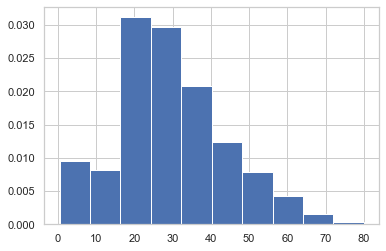

In [5]:
# Age - 임의의 값 넣기(해당 분포 중앙값, 평균,... 이런 값들을 넣음)

#비어있는 값을 빼거나 다른 값을 넣으면 되지만
#칼럼을 빼버리면 age는 필요한 변수니까 임의의 다른 값으로 대체해보자

#어떤 값을 넣어야할지 모르겠으니까 일단 히스토그램부터 그려보자
train_df['Age'].hist(bins = 10, density=True)

#히스토그램을 보니 중간값 넣는 것이 좋을것같다고 판단!

In [6]:
train_df['Age'].fillna(train_df['Age'].median(skipna=True), inplace=True)
# fillna : fill not available의 약자
# median : 중간값
# skipna=True : 사용할 수 없는 값을 무시하고 값을 채워라
# inplace True : 꼭 해줘야 실제로 값이 바뀜

In [7]:
# cabin의 값이 의미가 없어 별로 필요하지 않은 데이터라 삭제
train_df.drop('Cabin', axis=1, inplace=True)

In [8]:
# embarked 변수
train_df['Embarked'].value_counts() #value_counts()로 embarked를 구성하는 S,C,Q 의 갯수를 알 수 있음

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#중간값 넣기
train_df['Embarked'].fillna('S', inplace=True)

In [10]:
train_df.isnull().sum() 
#모든 값이 채워져서, 비워진 값을 계산한 수가 다 0이다

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
# test dataset에 대해서도 결측치를 채워줘야 한다.
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#Age Cabin 중앙값으로 채워넣기
test_df['Age'].fillna(test_df['Age'].median(skipna=True), inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

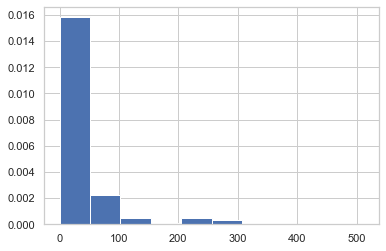

In [13]:
# fare 변수 1이 남는데, 어떻게 해줘야 할 지 히스토그램을 그려 확인해보자
test_df['Fare'].hist(density=True)

In [14]:
# 다른 빈 값들도 중앙값으로 채워줬으니 똑같이 중앙값으로 채워주자

test_df['Fare'].fillna(test_df['Fare'].median(skipna=True), inplace=True)

In [15]:
test_df.isnull().sum()
#결측치 전부 다 채움!

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# 필요없는 column 제거
# axis : 주는 방향은 열 의 방향 (아마도 행으로 주려면 0으로 하나보다)

train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [17]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [18]:
test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_df.head()

# Pclass Sex Embarked가 categorical 변수이기 때문에 모델을 돌리기 위해서는 numeric하게 바꿔줘야한다.
# 그것은 pandas에서 제공합니다

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [19]:
# categorical 변수 변환
train_data = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked'])
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


원 어팩터?
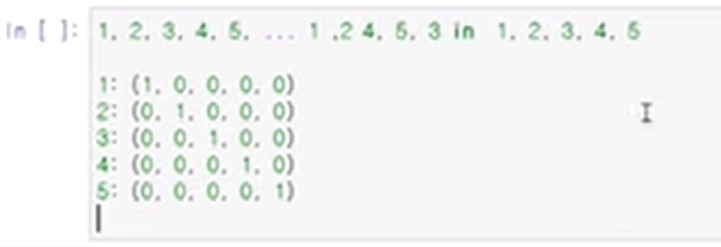

In [20]:
#남성과 여성은 한 라인만 써서 표현할 수 있으니, 여자 변수와 그의 양 옆을 삭제해준다

train_data.drop(['Pclass_3', 'Sex_male', 'Embarked_S'], axis=1, inplace=True)
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,22.0,1,0,7.2500,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,0,0,0


In [21]:
# logistic regression에서 했던 것 처럼,
# 생존여부에 따라 attribute 분포에 차이가 있는지 확인 한 후
# 이진 데이터니까 logistic regression 사용
# 학습시킨 logistic regression을 확인하여 변수의 유용성 확인
# confusion matrix 그려서 점수 도출

# 을 숙제로 내주셨다

## 생존 여부에 따른 데이터 시각화

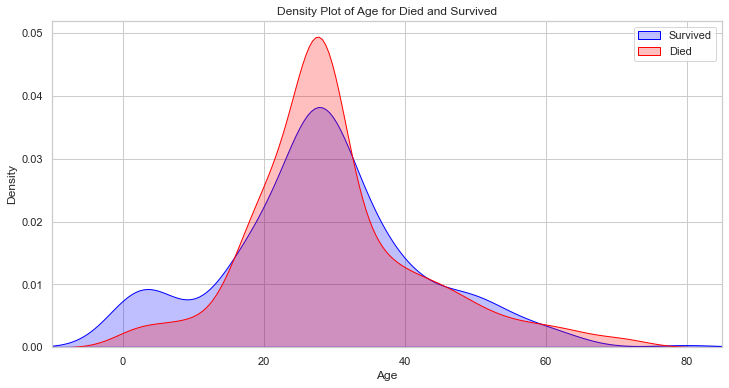

In [22]:
# 나이
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(train_data["Age"][train_data['Survived'] == 1], color="blue", shade=True)
sns.kdeplot(train_data["Age"][train_data['Survived'] == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Died and Survived')
ax.set(xlabel='Age')
plt.xlim(-10,85)

plt.show()

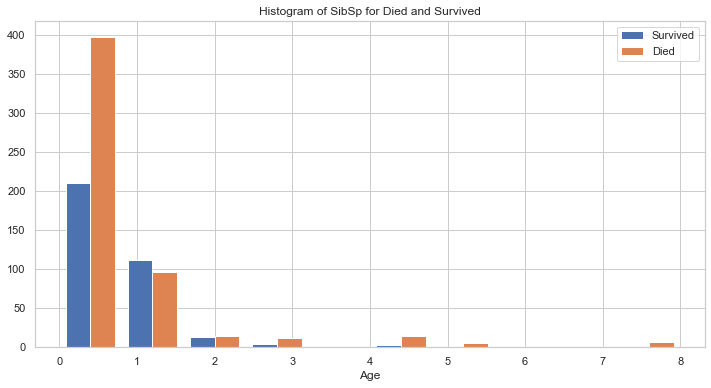

In [23]:
# SibSp
fig, ax = plt.subplots(figsize=(12,6))
plt.hist([
    train_data["SibSp"][train_data['Survived'] == 1],
    train_data["SibSp"][train_data['Survived'] == 0]
])
plt.legend(['Survived', 'Died'])
plt.title('Histogram of SibSp for Died and Survived')
ax.set(xlabel='Age')

plt.show()

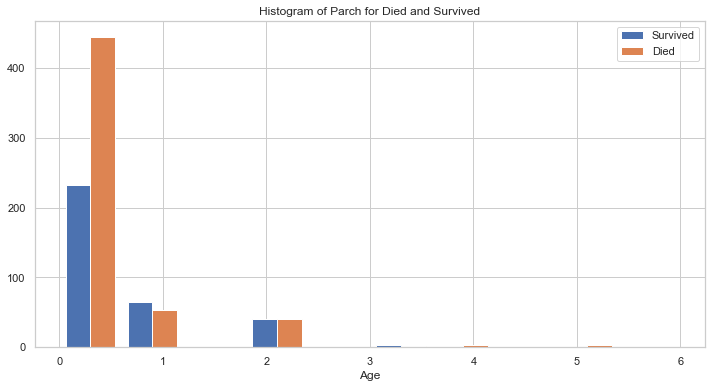

In [24]:
# Parch
fig, ax = plt.subplots(figsize=(12,6))
plt.hist([
    train_data["Parch"][train_data['Survived'] == 1],
    train_data["Parch"][train_data['Survived'] == 0]
])
plt.legend(['Survived', 'Died'])
plt.title('Histogram of Parch for Died and Survived')
ax.set(xlabel='Age')

plt.show()

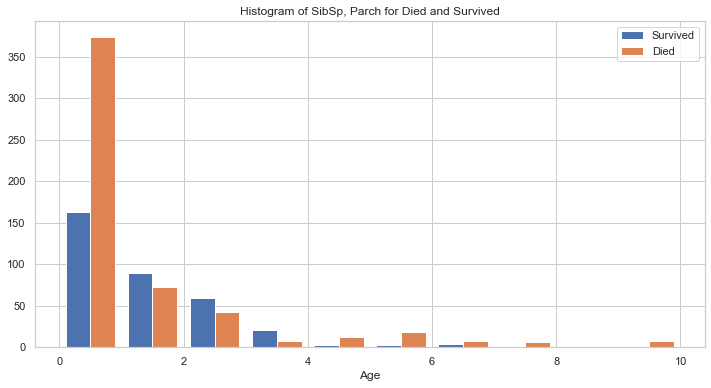

In [25]:
# SibSp Parch
fig, ax = plt.subplots(figsize=(12,6))
plt.hist([
    train_data["SibSp"][train_data['Survived'] == 1] + train_data["Parch"][train_data['Survived'] == 1],
    train_data["SibSp"][train_data['Survived'] == 0] + train_data["Parch"][train_data['Survived'] == 0]
])
plt.legend(['Survived', 'Died'])
plt.title('Histogram of SibSp, Parch for Died and Survived')
ax.set(xlabel='Age')

plt.show()

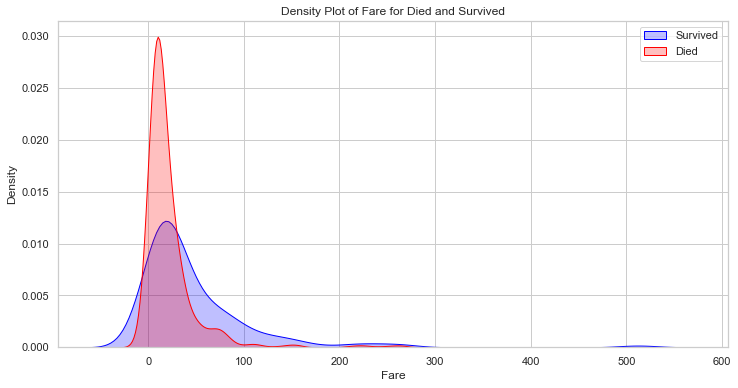

In [26]:
# Fare. 비용
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(train_data["Fare"][train_data['Survived'] == 1], color="blue", shade=True)
sns.kdeplot(train_data["Fare"][train_data['Survived'] == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Died and Survived')
ax.set(xlabel='Fare')

plt.show()

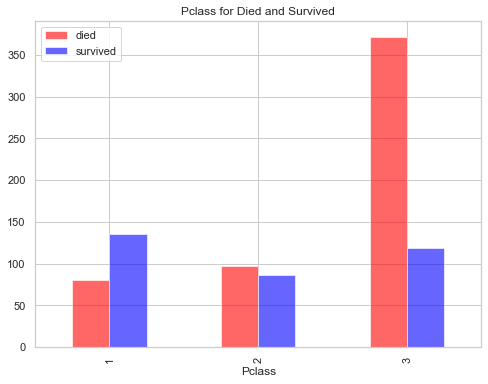

In [27]:
# p-class
stacked_bar = pd.DataFrame([[sum(train_data['Pclass_1'][train_data['Survived'] == 0]),
                             sum(train_data['Pclass_1'][train_data['Survived'] == 1])],
                            [sum(train_data['Pclass_2'][train_data['Survived'] == 0]),
                             sum(train_data['Pclass_2'][train_data['Survived'] == 1])],
                            [len(train_data[(train_data['Survived'] == 0) & (train_data['Pclass_1'] + train_data['Pclass_2'] == 0)]),
                             len(train_data[(train_data['Survived'] == 1) & (train_data['Pclass_1'] + train_data['Pclass_2'] == 0)])]
              ])
stacked_bar.index = [1, 2, 3]
stacked_bar.columns = ['died', 'survived']

fig, ax = plt.subplots(figsize=(8,6))
stacked_bar.plot(kind='bar', ax = ax, color=['red', 'blue'], alpha = 0.6)
plt.title('Pclass for Died and Survived')
ax.set(xlabel='Pclass')
plt.show()

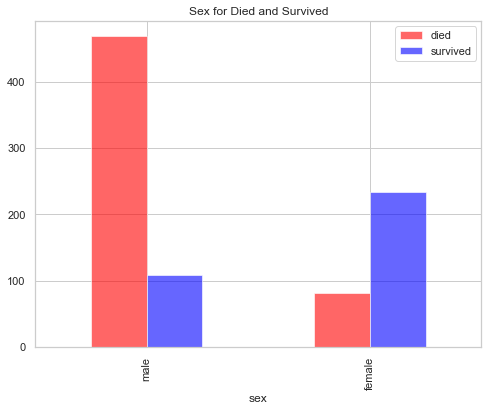

In [28]:
# 성별
stacked_bar = train_data.groupby(['Sex_female', 'Survived']).size().unstack()
stacked_bar.index = ['male', 'female']
stacked_bar.columns = ['died', 'survived']

fig, ax = plt.subplots(figsize=(8,6))
stacked_bar.plot(kind='bar', ax = ax, color=['red', 'blue'], alpha = 0.6)
plt.title('Sex for Died and Survived')
ax.set(xlabel='sex')
plt.show()

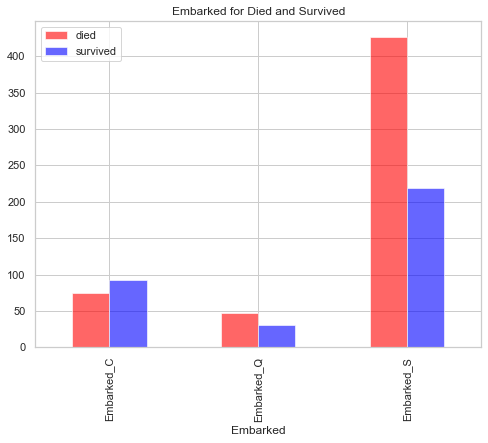

In [29]:
# embarked
stacked_bar = pd.DataFrame([[sum(train_data['Embarked_C'][train_data['Survived'] == 0]),
                             sum(train_data['Embarked_C'][train_data['Survived'] == 1])],
                            [sum(train_data['Embarked_Q'][train_data['Survived'] == 0]),
                             sum(train_data['Embarked_Q'][train_data['Survived'] == 1])],
                            [len(train_data[(train_data['Survived'] == 0) & (train_data['Embarked_C'] + train_data['Embarked_Q'] == 0)]),
                             len(train_data[(train_data['Survived'] == 1) & (train_data['Embarked_C'] + train_data['Embarked_Q'] == 0)])]
              ])
stacked_bar.index = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
stacked_bar.columns = ['died', 'survived']

fig, ax = plt.subplots(figsize=(8,6))
stacked_bar.plot(kind='bar', ax = ax, color=['red', 'blue'], alpha = 0.6)
plt.title('Embarked for Died and Survived')
ax.set(xlabel='Embarked')
plt.show()

In [30]:
cols = ["Age","Fare", 'SibSp', 'Parch',"Pclass_1","Pclass_2", "Embarked_C", "Embarked_Q","Sex_female"]

Xs = train_data[cols]
Y = train_data['Survived']

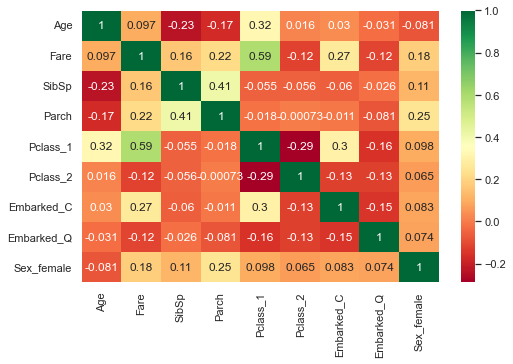

In [31]:
plt.subplots(figsize=(8, 5))
sns.heatmap(Xs.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

logit_reg_sm = sm.GLM(Y, Xs, 
                      family=sm.families.Binomial()) # family=sm.families.Binomial() 을 넣어야 logistic regressions
logit_result = logit_reg_sm.fit()
print(logit_result.summary()) # 변수의 z-score와 p-value # Pseudo R2는 OLS의 R2와 비슷하다고는 함

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -403.35
Date:                Tue, 17 May 2022   Deviance:                       806.70
Time:                        02:40:22   Pearson chi2:                     934.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0677      0.005    -12.943      0.0

In [33]:
logit_reg = LogisticRegression(max_iter = 300)
logit_reg.fit(Xs, Y)
confusion_matrix(Y, logit_reg.predict(Xs))

array([[479,  70],
       [103, 239]], dtype=int64)

In [34]:
train_data_2 = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked'])
train_data_2.drop(['Pclass_1', 'Pclass_2', 'Sex_male', 'Embarked_C', 'Embarked_Q'], axis=1, inplace=True)
train_data_2.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_3,Sex_female,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,1,0
2,1,26.0,0,0,7.9250,1,1,1
3,1,35.0,1,0,53.1000,0,1,1
4,0,35.0,0,0,8.0500,1,0,1


In [35]:
cols = ["Age","Fare", 'SibSp', 'Parch', "Pclass_3", "Embarked_S", "Sex_female"]

Xs = train_data_2[cols]
Y = train_data_2['Survived']

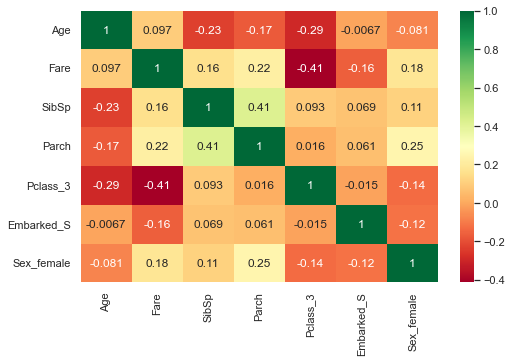

In [36]:
plt.subplots(figsize=(8, 5))
sns.heatmap(Xs.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [37]:
logit_reg_sm = sm.GLM(Y, Xs, 
                      family=sm.families.Binomial()) # family=sm.families.Binomial() 을 넣어야 logistic regressions
logit_result = logit_reg_sm.fit()
print(logit_result.summary()) # 변수의 z-score와 p-value # Pseudo R2는 OLS의 R2와 비슷하다고는 함

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.96
Date:                Tue, 17 May 2022   Deviance:                       797.91
Time:                        02:40:22   Pearson chi2:                     891.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0233      0.005     -4.502      0.0

In [38]:
logit_reg = LogisticRegression()
logit_reg.fit(Xs, Y)
confusion_matrix(Y, logit_reg.predict(Xs))

array([[490,  59],
       [108, 234]], dtype=int64)

In [39]:
train_data_3 = train_data_2.copy()
train_data_3['Alone'] = np.where(train_data_3['SibSp'] + train_data_3['Parch'] == 0, 1, 0)
train_data_3.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_3,Sex_female,Embarked_S,Alone
0,0,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,1,0,0
2,1,26.0,0,0,7.9250,1,1,1,1
3,1,35.0,1,0,53.1000,0,1,1,0
4,0,35.0,0,0,8.0500,1,0,1,1


In [40]:
train_data_3.drop(['SibSp', 'Parch', 'Fare'], axis=1, inplace=True)
train_data_3.head()

,Survived,Age,Pclass_3,Sex_female,Embarked_S,Alone
0,0,22.0,1,0,1,0
1,1,38.0,0,1,0,0
2,1,26.0,1,1,1,1
3,1,35.0,0,1,1,0
4,0,35.0,1,0,1,1


In [41]:
cols = ["Age", 'Alone', "Pclass_3", "Embarked_S", "Sex_female"]

Xs = train_data_3[cols]
Y = train_data_3['Survived']

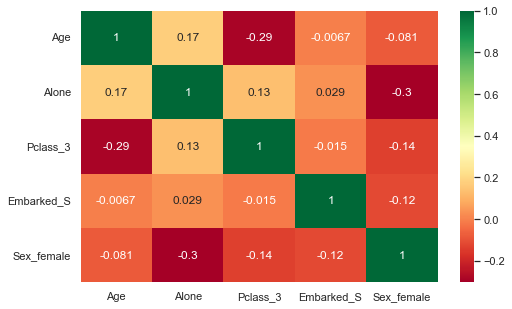

In [42]:
plt.subplots(figsize=(8, 5))
sns.heatmap(Xs.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [43]:
logit_reg_sm = sm.GLM(Y, Xs, 
                      family=sm.families.Binomial()) # family=sm.families.Binomial() 을 넣어야 logistic regressions
logit_result = logit_reg_sm.fit()
print(logit_result.summary()) # 변수의 z-score와 p-value # Pseudo R2는 OLS의 R2와 비슷하다고는 함

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -408.55
Date:                Tue, 17 May 2022   Deviance:                       817.10
Time:                        02:40:23   Pearson chi2:                     922.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0155      0.005     -3.058      0.0

In [44]:
logit_reg = LogisticRegression()
logit_reg.fit(Xs, Y)
confusion_matrix(Y, logit_reg.predict(Xs))

array([[476,  73],
       [111, 231]], dtype=int64)

In [45]:
train_data_4 = train_data_2.copy()
train_data_4.drop(['Fare'], axis=1, inplace=True)
train_data_4.head()

,Survived,Age,SibSp,Parch,Pclass_3,Sex_female,Embarked_S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,1,0
2,1,26.0,0,0,1,1,1
3,1,35.0,1,0,0,1,1
4,0,35.0,0,0,1,0,1


In [46]:
cols = ["Age", 'SibSp', 'Parch', "Pclass_3", "Embarked_S", "Sex_female"]

Xs = train_data_4[cols]
Y = train_data_4['Survived']

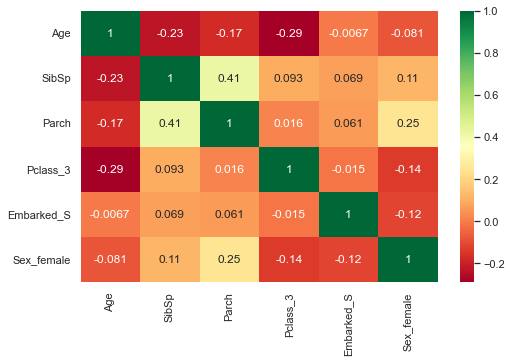

In [47]:
plt.subplots(figsize=(8, 5))
sns.heatmap(Xs.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [48]:
logit_reg_sm = sm.GLM(Y, Xs, 
                      family=sm.families.Binomial()) # family=sm.families.Binomial() 을 넣어야 logistic regressions
logit_result = logit_reg_sm.fit()
print(logit_result.summary()) # 변수의 z-score와 p-value # Pseudo R2는 OLS의 R2와 비슷하다고는 함

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -405.05
Date:                Tue, 17 May 2022   Deviance:                       810.10
Time:                        02:40:23   Pearson chi2:                     910.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0151      0.004     -3.412      0.0

In [49]:
logit_reg = LogisticRegression()
logit_reg.fit(Xs, Y)
confusion_matrix(Y, logit_reg.predict(Xs))

array([[484,  65],
       [108, 234]], dtype=int64)

## train_data에서

NameError: name 'auc' is not defined

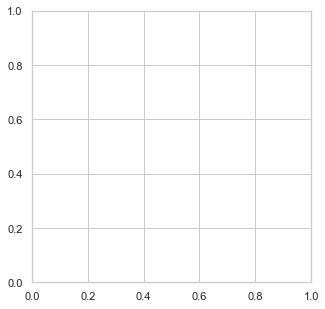

In [50]:
fpr, tpr, threshold = roc_curve(Y, logit_reg.predict_proba(Xs)[:, 1], pos_label = 1)

roc_df = pd.DataFrame({'sensitivity': tpr, '1 - specificity': fpr})

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
roc_df.plot(x = '1 - specificity', y = 'sensitivity', 
            label=f'ROC curve (auc = {auc(fpr, tpr):0.3f})', ax = ax)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.plot((0, 1), (0, 1))
ax.set_xlabel('1 - specificity')
ax.set_ylabel('sensitivity')

ax.fill_between(roc_df['1 - specificity'], 0, roc_df['sensitivity'], alpha = 0.3)

plt.show()

## train_data_2에서

In [ ]:
fpr, tpr, threshold = roc_curve(Y, logit_reg.predict_proba(Xs)[:, 1], pos_label = 1)

roc_df = pd.DataFrame({'sensitivity': tpr, '1 - specificity': fpr})

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
roc_df.plot(x = '1 - specificity', y = 'sensitivity', 
            label=f'ROC curve (auc = {auc(fpr, tpr):0.3f})', ax = ax)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.plot((0, 1), (0, 1))
ax.set_xlabel('1 - specificity')
ax.set_ylabel('sensitivity')

ax.fill_between(roc_df['1 - specificity'], 0, roc_df['sensitivity'], alpha = 0.3)

plt.show()